<p style="background-color:#FF9800;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - Akıllı Telefon Fiyatları</b></p>

<div style="text-align: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfk99c2JGn6MJD5Jug1Zx84W2sbGUbwmdBBA&s" width="200" height="200"/><img src="https://cdn-icons-png.flaticon.com/512/1279/1279648.png" width="200" height="200"/>
</div>

# <font color='#F57C00'> <b>Giriş</b><font color='black'> 

Bu projede, markalar, modeller, RAM, depolama, renk, sözleşme durumu (free) ve fiyat gibi çeşitli akıllı telefon özelliklerini içeren bir veri seti analiz edilip görselleştirilmiştir. İlk olarak, her bir sütundaki veri dağılımı, aralığı ve veri türleri anlaşılabilmesi amacıyla veri seti detaylı bir şekilde incelenmiştir. Analiz için veri setinin hazırlanması aşamasında, eksik (NaN) değerlerin uygun metotlarla doldurulması ve sütunlarda gerekli düzenlemelerin yapılması gibi veri temizleme ve ön işleme adımları uygulanmıştır. Uygun doldurma yöntemleri kullanılarak veri setindeki eksik veriler tamamlanmış ve analiz için eksiksiz ve doğru bir veri seti oluşturulmuştur.

Veri temizleme ve hazırlık sürecinin ardından, veri içindeki ilişkileri ve desenleri incelemek amacıyla çeşitli görselleştirmeler yapılmıştır. Bu görselleştirmeler arasında markalara göre fiyat dağılımı, RAM ve depolama kapasitesi ile ilgili analizler, renk dağılımı ve cihazların sözleşme durumu analizleri bulunmaktadır. Bu görselleştirmelerle farklı özelliklerin birbirleriyle nasıl ilişkilendiği, özellikle fiyat açısından nasıl bir etki oluşturduğu ve akıllı telefon pazarındaki trendlerin ve segmentlerin belirlenmesi amaçlanmıştır.

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunların Düzenlenmesi</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
<li><a href="#conclusion">Sonuç</a></li>
</ul>

<a id='import-library'></a>
# <font color='#F57C00'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='#F57C00'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [34]:
df0 = pd.read_csv("smartphones.csv", index_col= 'Smartphone')
df = df0.copy()

In [35]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
Smartphone,,,,,,,
Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [36]:
df.sample(5)

,Brand,Model,RAM,Storage,Color,Free,Final Price
Smartphone,,,,,,,
Realme C53 6/128GB 33W Carga Rápida Dorado Libre,Realme,C53,6.0,128.0,Gold,Yes,181.60
Samsung Galaxy S22 Enterprise Edition 5G 128GB Negro Libre,Samsung,Galaxy S22,NaN,128.0,Black,Yes,799.00
Honor X6 4/64GB Midnight Black Libre,Honor,X6,4.0,64.0,Black,Yes,129.00
Xiaomi Redmi Note 12 5G 4/128GB Azul Libre,Xiaomi,Redmi Note 12,4.0,128.0,Blue,Yes,209.90
Black Shark 4 8/128GB Negro Libre,Xiaomi,Shark 4,8.0,128.0,Black,Yes,400.18


<a id='understanding-dataset'></a>
# <font color='#F57C00'> <b>Veri Setini Anlama</b><font color='black'> 

* **Smartphone Name:** Akıllı telefonun benzersiz tanımlayıcısı veya model adı.
* **Brand:** Akıllı telefon markası.
* **Model:** Akıllı telefon markası modeli.
* **RAM (Random Access Memory):** Çoklu görev için kullanılabilen bellek miktarı.
* **Storage:** Akıllı telefonun kapasitesi.
* **Color:** Akıllı telefonun rengi.
* **Free:** Akıllı telefon bir cep telefonu şirketi sözleşmesine bağlıysa Evet/Hayır.
* **Price:** Akıllı telefonun ilgili para birimi cinsinden fiyatı.liyeti.

In [39]:
df.shape

(1816, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1816 entries, Realme C55 8/256GB Sunshower Libre to Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1816 non-null   object 
 1   Model        1816 non-null   object 
 2   RAM          1333 non-null   float64
 3   Storage      1791 non-null   float64
 4   Color        1816 non-null   object 
 5   Free         1816 non-null   object 
 6   Final Price  1816 non-null   float64
dtypes: float64(3), object(4)
memory usage: 113.5+ KB


In [41]:
df.duplicated().sum()

16

In [ ]:
# duplicated (tekrar eden) satırları kontrol etme işlemi
df[df.duplicated(keep=False)]

In [43]:
df = df.drop_duplicates(keep='first') # duplicated satırları silme işlemi

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1318.0,5.946889,2.666517,1.00,4.0000,6.00,8.0000,12.00
Storage,1775.0,162.694085,139.875397,2.00,64.0000,128.00,256.0000,1000.00
Final Price,1800.0,491.401250,398.601282,60.46,200.5325,349.99,654.1325,2271.28


In [45]:
df.describe(include= "object").T

,count,unique,top,freq
Brand,1800,37,Samsung,450
Model,1800,383,iPhone 13,60
Color,1800,17,Black,532
Free,1800,2,Yes,1756


In [46]:
df.nunique()

Brand            37
Model           383
RAM               7
Storage          12
Color            17
Free              2
Final Price    1022
dtype: int64

In [47]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1800   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50  ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ RAM             │   482 │   26.78 │   5.947 │   2.667 │       1 │       4 │    6 │      8 │    12 │ ▁▇▅▆ ▂ │  │
│ │ Storage         │    25 │    1.39 │   162.7 │   139.9 │       2 │      64 │  128 │    256 │  1000 │  ▇▃ ▁  │  │
│ │ Final Price     │     0 │       0 │   491.4 │   398.6 │   60.46 │   200.5 │  350 │  654.1 │  2271 │  ▇▃▁▁  │  │
│ └─────────────────┴───────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Brand                     │       0 │          0 │                            1 │                     1800 │  │
│ │ Model                     │       0 │          0 │                          1.8 │                     3288 │  │
│ │ Color                     │       0 │          0 │                            1 │                     1800 │  │
│ │ Free                      │       0 │          0 │                            1 │                     1800 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [48]:
df.isnull().sum()

Brand            0
Model            0
RAM            482
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

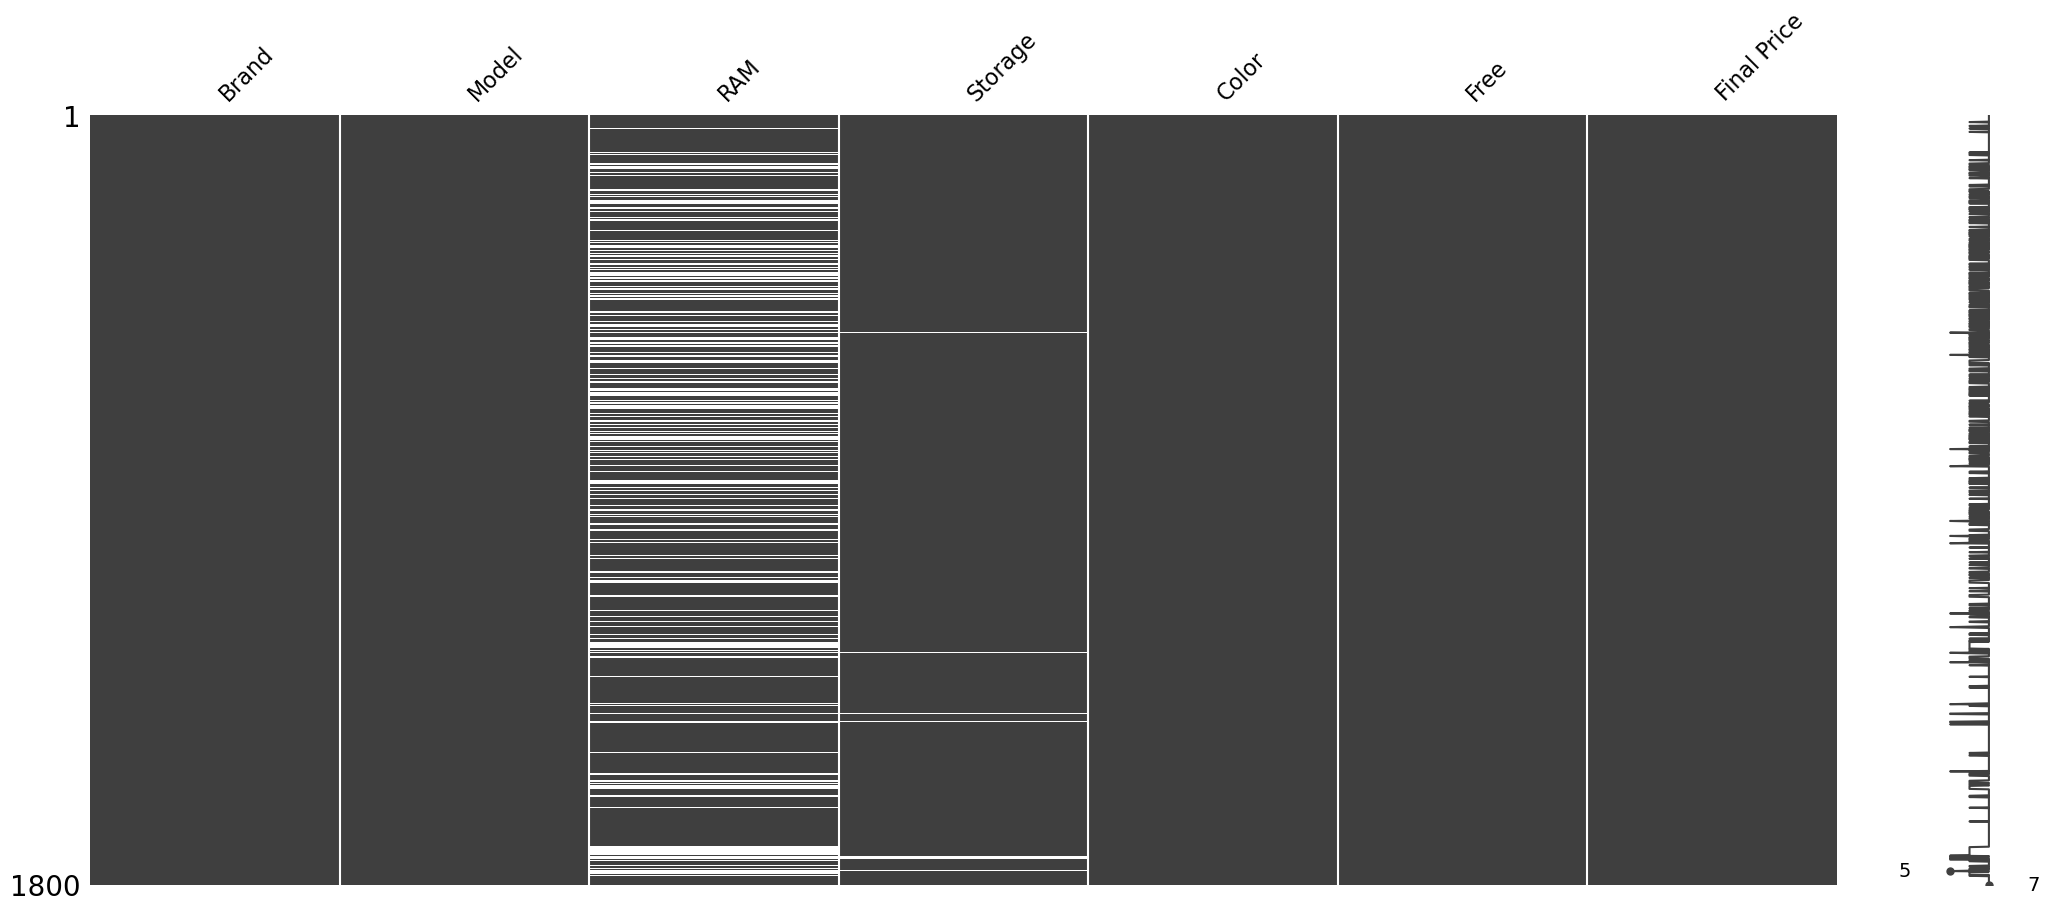

In [49]:
msno.matrix(df);

<a id='organizing-columns'></a>
# <font color='#F57C00'> <b>Sütunların Düzenlenmesi</b><font color='black'> 

In [51]:
df.columns

Index(['Brand', 'Model', 'RAM', 'Storage', 'Color', 'Free', 'Final Price'], dtype='object')

In [52]:
df.columns = df.columns.str.lower()
df.columns = ['brand', 'model', 'ram', 'storage', 'color', 'free', 'price']
df.columns

Index(['brand', 'model', 'ram', 'storage', 'color', 'free', 'price'], dtype='object')

## <font color='#FF9800'> <b>"brand" Sütunu</b><font color='black'> 

In [54]:
df.brand.nunique()

37

In [55]:
df.brand.unique()

array(['Realme', 'Samsung', 'Motorola', 'Xiaomi', 'Nothing', 'POCO',
       'Apple', 'OPPO', 'Alcatel', 'Vivo', 'ZTE', 'OnePlus', 'TCL', 'CAT',
       'SPC', 'Cubot', 'Google', 'Ulefone', 'Nokia', 'Honor', 'Huawei',
       'Sony', 'Hammer', 'Qubo', 'Blackview', 'Asus', 'Microsoft', 'BQ',
       'Crosscall', 'Doro', 'Fairphone', 'Funker', 'Gigaset', 'LG',
       'Maxcom', 'Swissvoice', 'Lenovo'], dtype=object)

In [56]:
df.brand = df.brand.str.strip()

"brand" sütunu şimdilik normal görünmektedir.

## <font color='#FF9800'> <b>"model" Sütunu</b><font color='black'> 

In [59]:
df.model.nunique()

383

In [60]:
df.model.dtype

dtype('O')

"model" sütunu şimdilik normal görünmektedir.

## <font color='#FF9800'> <b>"ram" Sütunu</b><font color='black'> 

In [63]:
df.ram.nunique()

7

In [64]:
df.ram.unique()

array([ 8.,  4.,  6., 12., nan,  3.,  2.,  1.])

NaN değerleri doldurduktan sonra sütunun dtype'ı floaat'tan integer'a çevrilecektir.

## <font color='#FF9800'> <b>"storage" Sütunu</b><font color='black'> 

In [67]:
df.storage.nunique()

12

In [68]:
df.storage.unique()

array([ 256.,  128.,  512.,   64.,   32.,   16.,    2.,   nan, 1000.,
          4.,   12.,    3.,    8.])

After filling the NaN values, we'll change the dtype of the storage column from float to integer.

## <font color='#FF9800'> <b>"color" Sütunu</b><font color='black'> 

In [71]:
df.color.nunique()

17

In [72]:
df.color.unique()

array(['Yellow', 'Blue', 'Gray', 'White', 'Black', 'Green', 'Silver',
       'Gold', 'Brown', 'Orange', 'Purple', 'Pink', 'Red', 'Turquoise',
       'Rainbow', 'Bronze', 'Crystal'], dtype=object)

"color" sütunu şimdilik normal görünmektedir.

## <font color='#FF9800'> <b>"free" Sütunu</b><font color='black'> 

In [75]:
df.free.nunique()

2

In [76]:
df.free.unique()

array(['Yes', 'No'], dtype=object)

In [77]:
# Yes değerlerini -> True; No değerlerini -> False yapma işlemi
df['free'] = df['free'].map({'Yes': True, 'No': False})

In [78]:
df.free.dtype

dtype('bool')

## <font color='#FF9800'> <b>"price" Sütunu</b><font color='black'> 

In [80]:
df.price.nunique()

1022

In [81]:
df.price.dtype

dtype('float64')

"price" sütunu şimdilik normal görünmektedir.

<a id='nan-values'></a>
# <font color='#F57C00'> <b>NaN Değerler</b><font color='black'> 

In [84]:
df.isnull().sum()

brand        0
model        0
ram        482
storage     25
color        0
free         0
price        0
dtype: int64

## <font color='#FF9800'> <b>"ram" Sütunundaki NaN Değerler</b><font color='black'> 

In [86]:
df.ram.isnull().sum()

482

In [87]:
df['ram'] = df.groupby('brand')['ram'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

In [88]:
df.ram.isnull().sum() # hala daha NaN değerler mevcut

295

In [89]:
df[df['ram'].isna()].model.unique()

array(['iPhone 14', 'iPhone 12', 'iPhone 11', 'iPhone 13', 'iPhone XR',
       'iPhone 8', 'iPhone XS', 'iPhone SE', '11 Pro', 'iPhone X',
       'iPhone 7', 'Xperia XZ2', 'Aquaris C', '3+', 'Xperia L1',
       'iPhone 6s'], dtype=object)

ChatGPT'ye bu modeldeki telefonların genellikle ne kadar RAM'e sahip olduğunu sordum ve kalan NaN değerlerini bana verilen değerlerle doldurdum.

In [91]:
# Telefon modelleri ve bu modellerin ram değerleri
ram_values = {
    'iPhone 14': 6,
    'iPhone 12': 4,
    'iPhone 11': 4,
    'iPhone 13': 4,
    'iPhone XR': 3,
    'iPhone 8': 2,
    'iPhone XS': 4,
    'iPhone SE': 3,
    '11 Pro': 4,
    'iPhone X': 3,
    'iPhone 7': 2,
    'Xperia XZ2': 4,
    'Aquaris C': 2,
    '3+': 4,
    'Xperia L1': 2,
    'iPhone 6s': 2
}

# NaN değerlerinin telefon modeline göre doldurulması
df['ram'] = df.apply(lambda row: ram_values.get(row['model'], row['ram']) if pd.isna(row['ram']) else row['ram'], axis=1)

In [92]:
df.ram.isnull().sum()

0

## <font color='#FF9800'> <b>"storage" Sütunundaki NaN Değerler</b><font color='black'> 

In [94]:
df.storage.isnull().sum()

25

In [95]:
# NaN değerlerinin marka ve model bazında medyan değerle doldurulması
df['storage'] = df.groupby(['brand', 'model'])['storage'].transform(
    lambda x: x.fillna(x.median()) if x.median() == x.median() else x.fillna(df['storage'].median())
)

In [96]:
df.storage.isnull().sum()

0

In [193]:
# NaN değerleri doldurduktan sonra;
df.isnull().sum()

brand      0
model      0
ram        0
storage    0
color      0
free       0
price      0
dtype: int64

In [199]:
# ram ve storage sütunlarının dtype'ını int yapma işlemi
df.ram = df.ram.astype('int')
df.storage = df.storage.astype('int')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1800 entries, Realme C55 8/256GB Sunshower Libre to Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   brand    1800 non-null   object 
 1   model    1800 non-null   object 
 2   ram      1800 non-null   int32  
 3   storage  1800 non-null   int32  
 4   color    1800 non-null   object 
 5   free     1800 non-null   bool   
 6   price    1800 non-null   float64
dtypes: bool(1), float64(1), int32(2), object(3)
memory usage: 150.7+ KB


<a id='data-visualization'></a>
# <font color='#F57C00'> <b>Veri Görselleştirme</b><font color='black'> 

In [98]:
# notebook'a uyan renk paletinin tanımlanması
colors = ['#E65100', '#F57C00', '#FF9800', '#FFC107', '#FF5722', 
           '#FFA726', '#FF7043', '#FFB74D', '#FFD54F', '#FFE082']

## <font color='#FF9800'> <b>'ram' Bazında Pairplot Çizimi</b><font color='black'> 

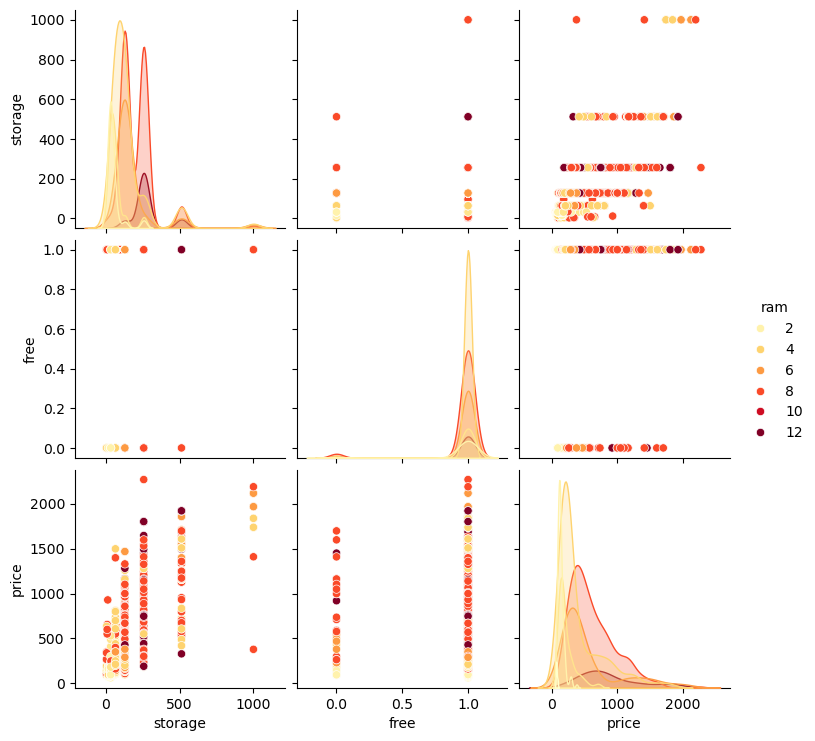

In [201]:
sns.pairplot(df, hue= "ram", palette= "YlOrRd");

Bu pairplot, RAM seviyesini renk olarak kullanarak depolama, "free" ve fiyat gibi çeşitli akıllı telefon özellikleri arasındaki ilişkileri görselleştirmektedir.

- **Köşegen Grafikleri:** Bunlar, her bir değişkenin farklı RAM seviyeleri için dağılımını gösteren KDE (Kernel Yoğunluk Tahmini) grafikleridir. Örneğin, RAM boyutuna göre fiyat dağılımına baktığımızda, düşük RAM'li modellerin genellikle daha düşük fiyatlara sahip olduğunu, yüksek RAM'li modellerin (özellikle 8GB ve üstü) ise daha geniş bir fiyat aralığına sahip olduğunu ve bazı modellerin yüksek fiyatlara ulaştığını görebiliyoruz.
- **Depolama ile Fiyat Arasındaki İlişki:** Daha yüksek RAM'e sahip modellerin (daha koyu tonlar) genellikle daha yüksek depolama kapasiteleri ve fiyatlarla uyumlu olduğu gözlemlenmektedir. Bu korelasyon, üst düzey modellerin genellikle hem daha yüksek RAM hem de depolamaya sahip olduğunu göstermektedir.
- **"Free" ile Fiyat ve "Free" ile Depolama Arasındaki İlişki:** "Free" özelliği, telefonun bir cep telefonu operatörünün sözleşmesine bağlı olup olmadığını (Yes/No) ifade etmektedir. Grafikten, "free" özelliğinin diğer değişkenlerle (RAM, depolama ve fiyat) belirgin bir trend göstermediği görülmektedir, çünkü noktalar grafikte belirli bir düzen olmaksızın dağılmış durumdadır. Bu, bir telefonun sözleşmeye bağlı olup olmamasının RAM, depolama veya fiyat üzerinde güçlü bir etkisi olmadığını düşündürmektedir.
- **Genel Yorum:** Pairplot, RAM’in hem depolama hem de fiyat ile ilişkili olduğunu etkili bir şekilde vurgulamaktadır. Daha yüksek RAM’e sahip modeller, genellikle daha yüksek depolama ve fiyat aralıklarında yer almakta ve bu da yüksek RAM’e sahip cihazların genellikle daha üst düzey kategorilere ait olduğunu göstermektedir; bu durum telefonun sözleşmeye bağlı olup olmamasından bağımsız olarak geçerlidir.

## <font color='#FF9800'> <b>RAM ve Price (Fiyat) Arasındaki İlişki</b><font color='black'> 

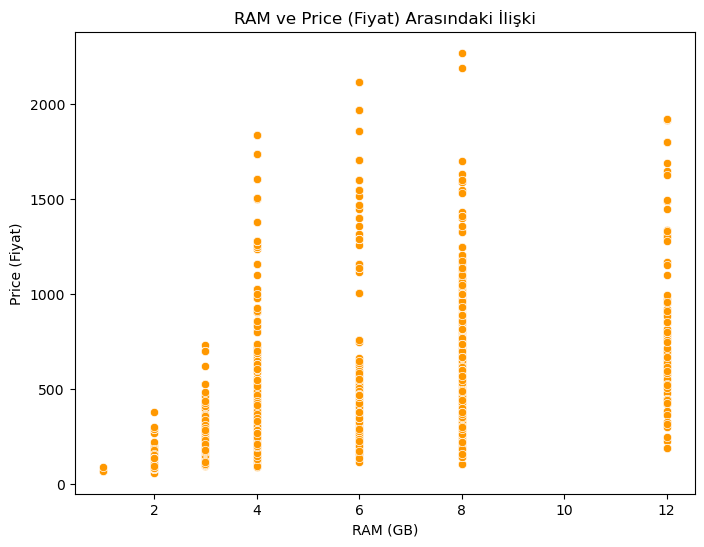

In [205]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='ram', y='price', data=df, color= "#FF9800")

plt.title('RAM ve Price (Fiyat) Arasındaki İlişki')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Fiyat)')

plt.show()

Bu dağılım grafiğinde RAM boyutu (GB cinsinden) ile akıllı telefonların fiyatı arasındaki ilişki gözlemlenmektedir. Her bir nokta bir telefon modelini temsil etmektedir. Genel olarak, RAM boyutu arttıkça fiyatın da arttığı bir eğilim görülmekte ancak her RAM kategorisinde de fiyat farklılıkları mevcut. Bu durum, RAM’in fiyat üzerinde etkisi olduğunu gösterirken, başka faktörlerin de fiyatı etkilediğini işaret etmektedir.

## <font color='#FF9800'> <b>Markalara Göre Ortalama Fiyatlar</b><font color='black'> 

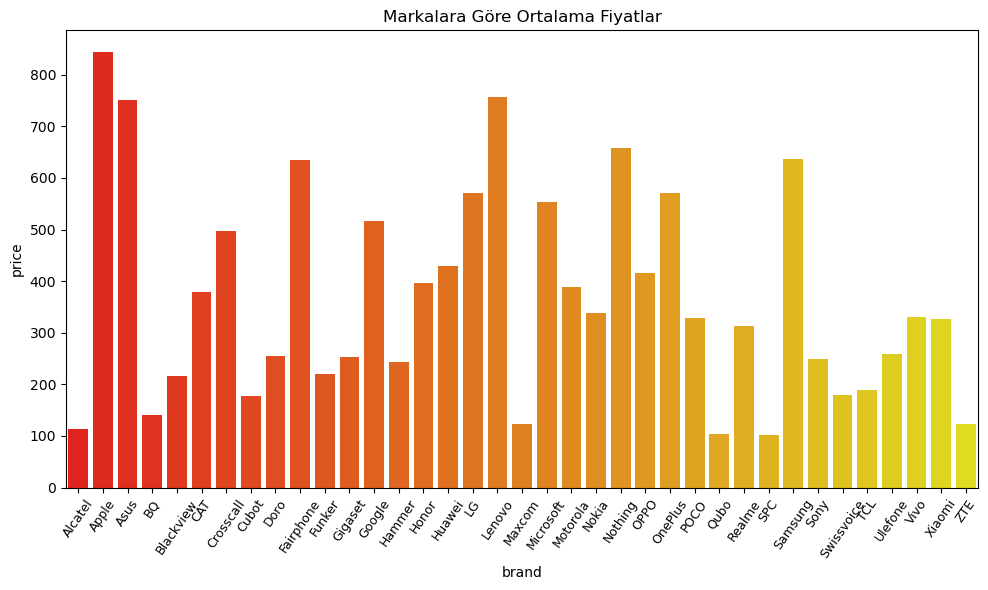

In [106]:
# Ortalama fiyatları markaya göre gruplandırma
avg_price_by_brand = df.groupby('brand')['price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='brand', y='price', data=avg_price_by_brand, palette="autumn")

plt.title('Markalara Göre Ortalama Fiyatlar')
plt.xticks(rotation=55, size= 9)
plt.tight_layout()

plt.show()

Bu çubuk grafiğinde markalara göre akıllı telefonların ortalama fiyatları gösterilmektedir. Apple ve Samsung gibi bazı markalar daha yüksek ortalama fiyatlara sahip, bu da onları premium bir pazar konumuna işaret etmektedir. Diğer yandan Xiaomi ve Huawei gibi markalar ise daha düşük ortalama fiyatlara sahiptir. Muhtemelen bu markalar daha bütçe dostu tüketicilere hitap ediyorlar. Markalar arasında geniş bir fiyat aralığının olması, pazarlama konumlandırmasında önemli farklılıklar olduğunu da göstermektedir.

## <font color='#FF9800'> <b>Storage (Depolama) ve Price (Fiyat) Arasındaki İlişki</b><font color='black'> 

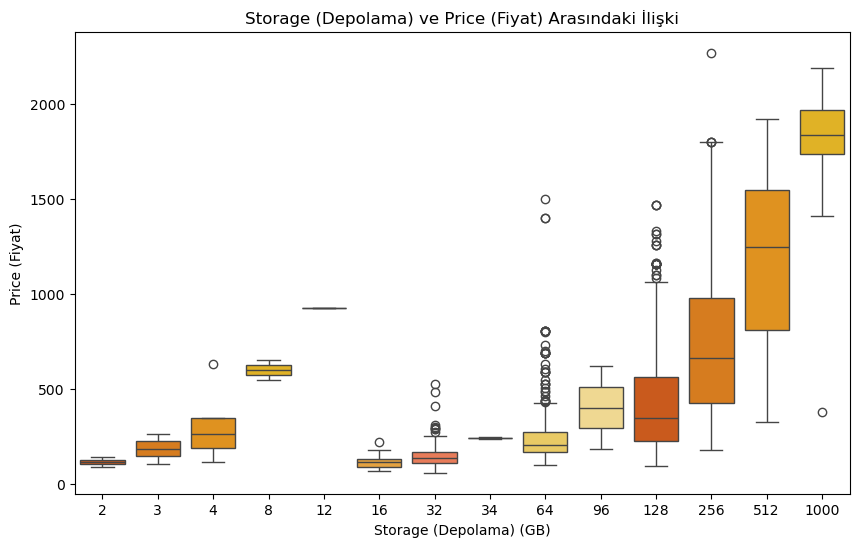

In [203]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='storage', y='price', data=df, palette= colors)

plt.title('Storage (Depolama) ve Price (Fiyat) Arasındaki İlişki')
plt.xlabel('Storage (Depolama) (GB)')
plt.ylabel('Price (Fiyat)')

plt.show()

Bu kutu grafiğinde depolama kapasitesi (GB cinsinden) ile akıllı telefon fiyatı arasındaki ilişki incelenmektedir. Depolama kapasitesi arttıkça fiyatların da arttığı açık bir eğilim var. Yüksek depolama seviyelerinde fiyat değişkenliği de artmakta, bu durum yüksek depolama kapasitesine sahip modellerin geniş bir fiyat aralığında sunulabileceğini ve bunun da ek özellikler veya marka farklarıyla ilişkili olabileceğini göstermektedir.

## <font color='#FF9800'> <b>Akıllı Telefonlarda En Çok Kullanılan 10 Renk</b><font color='black'> 

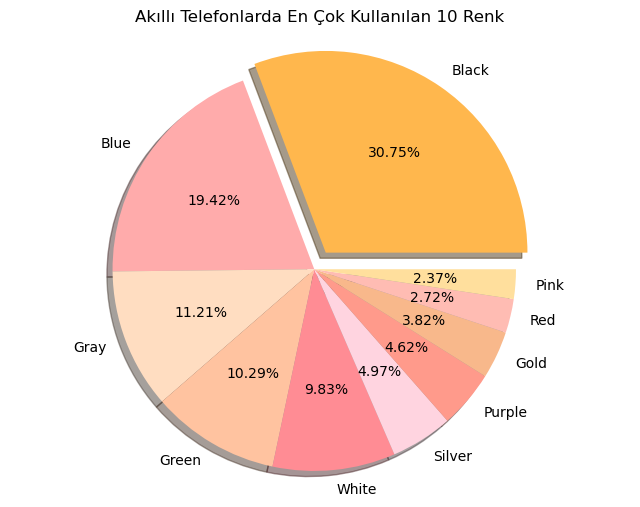

In [112]:
top10_color = df['color'].value_counts()[:10]

plt.figure(figsize=(8,6))
plt.pie(top10_color,
        labels=top10_color.index,
        autopct='%1.2f%%',
        explode= [0.1,0, 0, 0, 0, 0, 0, 0, 0, 0],
        shadow= True,
        colors= ['#FFB74D', '#FFABAB', '#FFDDC1', '#FFC3A0', '#FF8C94',
                            '#FFD4E0', '#FF9A8B', '#F8B88B', '#FFBCB3', '#FFDF9D']
       )

plt.title('Akıllı Telefonlarda En Çok Kullanılan 10 Renk')
plt.axis('equal')

plt.show()

Bu pasta grafiğinde akıllı telefonlarda en çok kullanılan 10 rengin dağılımı gösterilmektedir. Siyah, Mavi ve Beyaz en yaygın renkler olarak öne çıkmakta ve bu durum popüler tüketici tercihlerini yansıtmaktadır. Bu renklerin hakimiyeti, geniş bir kitleye hitap eden çok yönlü ve çekici olmalarından kaynaklanıyor olabilir.

## <font color='#FF9800'> <b>İlk 10 Markanın RAM Dağılımı</b><font color='black'> 

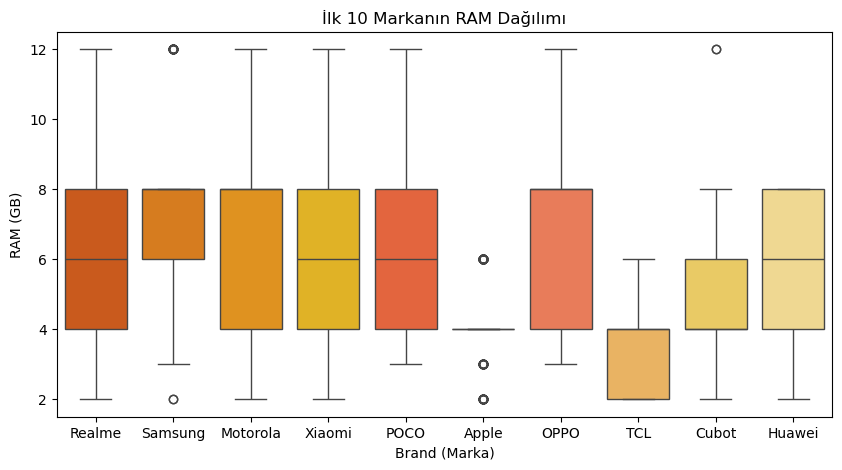

In [115]:
# Top 10 markanın belirlenmesi
top_10_brands = df['brand'].value_counts().head(10).index
df_top_10 = df[df['brand'].isin(top_10_brands)]

# Bar plot
plt.figure(figsize=(10,5))
sns.boxplot(x='brand', y='ram', data=df_top_10, palette= colors)

plt.title('İlk 10 Markanın RAM Dağılımı')
plt.xlabel('Brand (Marka)')
plt.ylabel('RAM (GB)')

plt.show()

Bu kutu grafiğinde en popüler 10 markanın RAM dağılımı karşılaştırılmaktadır. Grafik, markaların sundukları RAM boyutları aralığı ve medyan RAM boyutlarında farklılıklar gösterdiğini ortaya koymaktadır. Örneğin, bazı markalar hem düşük hem de yüksek seviye modelleri kapsayan geniş bir RAM aralığı sunarken, diğer markalar belirli RAM boyutlarına odaklanmış durumda, muhtemelen belirli bir pazar segmentini hedeflemektedir.

## <font color='#FF9800'> <b>Sütunlar Arasındaki İlişki (Korelasyon)</b><font color='black'> 

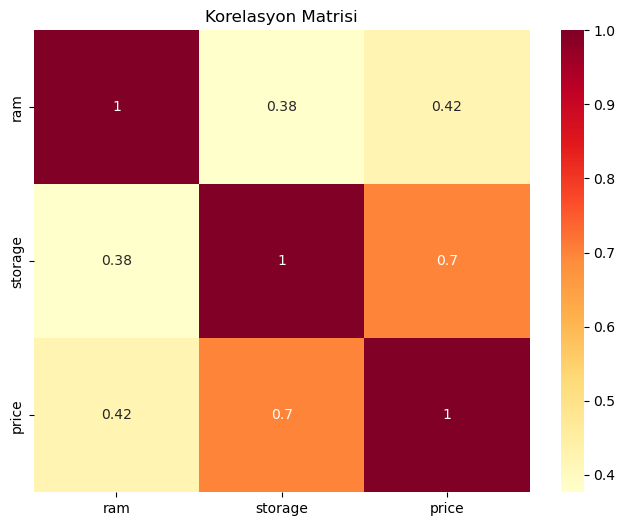

In [207]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['ram', 'storage', 'price']].corr(), annot=True, cmap='YlOrRd')

plt.title('Korelasyon Matrisi')

plt.show()

Bu ısı haritası; RAM, depolama alanı ve fiyat gibi çeşitli akıllı telefon özellikleri arasındaki korelasyon matrisini temsil etmektedir. Yüksek pozitif korelasyonlar koyu renklerle gösterilmiştir. RAM, depolama ve fiyat arasında orta derecede pozitif bir korelasyon mevcut, bu da özelliklerin (RAM ve depolama) artmasıyla birlikte fiyatın da artma eğiliminde olduğunu göstermektedir. Bu matris, birbirini etkileme eğiliminde olan özellikleri belirlemeye yardımcı olmaktadır.

<a id='conclusion'></a>
# <font color='#F57C00'> <b>Sonuç</b><font color='black'> 

Bu projede, veri analizi ve görselleştirme tekniklerinden faydalanılarak akıllı telefon pazarı hakkında değerli içgörüler elde edilmiştir. Yapılan analizler, RAM, depolama ve fiyat gibi özellikler arasında önemli ilişkiler olduğunu ortaya koymuştur. Yüksek RAM ve depolama kapasitesine sahip cihazların genellikle daha yüksek fiyat aralıklarında yer aldığı gözlemlenmiş ve bu özelliklerin çoğunlukla premium akıllı telefon modellerinde bulunduğu sonucuna varılmıştır. Ayrıca, markalara göre yapılan fiyat analizi, markalar arasında fiyat konusunda önemli farklılıklar olduğunu göstermiştir; bu durum, markaların pazar konumlandırması, hedef kitleleri ve marka değerleri arasındaki farkları yansıtıyor olabilir.

Sözleşme durumu (free) analizinde, bir telefonun bir operatör sözleşmesine bağlı olup olmamasının fiyat, RAM veya depolama üzerinde belirgin bir etkisinin olmadığı görülmüştür. Bu durum, operatör sözleşmelerinin cihaz özelliklerinden bağımsız olduğunu işaret etmektedir. Renk dağılımı ise akıllı telefonlarda en popüler renk seçeneklerinin belirlenmesini sağlamış ve tüketici tercihlerinin anlaşılmasına katkı sağlamıştır.

Genel olarak bu proje, akıllı telefon özellikleri ve fiyatlandırma trendleri hakkında önemli içgörüler ve eğilimler sunmuştur. Yapılan görselleştirmeler, verinin açık ve sezgisel bir şekilde anlaşılmasını sağlamış ve paydaşların pazar trendleri ve ürün konumlandırması hakkında bilinçli kararlar almasına yardımcı olmuştur.

<p style="background-color:#FF9800;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>